In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import credentials
import requests

#pulling data API
key =credentials.login['key_isaham']  # extract password

symbol = "UNISEM"  # which stock to pull
response = requests.get("https://admin.isaham.my/api/chart?stock={}&key={}".format(symbol,key))
data = response.json()

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# makes plots bigger
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [3]:
ob_cross=85
os_cross=20

In [4]:
df= pd.DataFrame.from_dict(data)
#df_actual = pd.DataFrame.from_dict(data)

In [5]:
df= df[['c','d','h','l','o','v']]
#df_actual= df_actual[['c','d','h','l','o','v']]

In [6]:
df['d'] = pd.to_datetime(df['d'], dayfirst= True )
#df_actual['d'] = pd.to_datetime(df_actual['d'], dayfirst= True )

In [7]:
df

,c,d,h,l,o,v
0,1.2513,1998-07-30,1.2667,1.1744,1.1744,655200.0
1,1.2615,1998-07-31,1.3205,1.2410,1.2615,526500.0
2,1.2769,1998-08-03,1.2821,1.2308,1.2308,288600.0
3,1.2948,1998-08-04,1.3205,1.2769,1.2769,783900.0
4,1.2948,1998-08-05,1.3077,1.2769,1.3077,89700.0
...,...,...,...,...,...,...
5562,7.6100,2021-03-18,7.7000,7.2500,7.2500,3528300.0
5563,7.6900,2021-03-19,7.7000,7.3500,7.4000,1052400.0
5564,7.8600,2021-03-22,7.9300,7.6000,7.6900,938100.0
5565,8.0500,2021-03-23,8.1500,7.8700,7.9000,2084900.0


In [8]:
#identify MA50
n=50
ma50=[] 

for i in range(len(df["c"])-(n-1)):
    ma = round(sum(df["c"][i:i+(n)])/n,4)
    #print(ma)
    ma50.append(ma)
    
df["MA50"] = pd.Series(ma50)
df["MA50"] = df["MA50"].shift(n-1)
#df["MA50"]

In [9]:
#filter uptrend price above ma50
# Calculating the gap of both MA
df["MAgap"] = df["c"] -  df["MA50"] 

In [10]:
df=df[df['MAgap']>0]

In [11]:
df.set_index('d',inplace=True,drop=True)

In [12]:
df.index.name = None

In [13]:
#Create the "L14" column in the DataFrame
df['L14'] = df['l'].rolling(window=14).min()

<ipython-input-13-c8cedd4ee1ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L14'] = df['l'].rolling(window=14).min()


In [14]:
#Create the "H14" column in the DataFrame
df['H14'] = df['h'].rolling(window=14).max()

<ipython-input-14-d31995a3027f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['H14'] = df['h'].rolling(window=14).max()


In [15]:
#Create the "%K" column in the DataFrame
df['%K'] = 100*((df['c'] - df['L14']) / (df['H14'] - df['L14']) )

<ipython-input-15-4176b4b68b62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%K'] = 100*((df['c'] - df['L14']) / (df['H14'] - df['L14']) )


In [16]:
#Create the "%D" column in the DataFrame
df['%D'] = df['%K'].rolling(window=3).mean()

<ipython-input-16-cf2cb0f92c26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%D'] = df['%K'].rolling(window=3).mean()


In [17]:
df.head(5)

,c,h,l,o,v,MA50,MAgap,L14,H14,%K,%D
1998-10-12,1.2564,1.2564,1.2564,1.2564,183300.0,1.1716,0.0848,NaN,NaN,NaN,NaN
1998-10-13,1.2564,1.2615,1.2564,1.2615,81900.0,1.1717,0.0847,NaN,NaN,NaN,NaN
1998-10-14,1.2564,1.2564,1.2564,1.2564,101400.0,1.1716,0.0848,NaN,NaN,NaN,NaN
1998-10-15,1.2564,1.2718,1.2564,1.2564,70200.0,1.1712,0.0852,NaN,NaN,NaN,NaN
1998-10-16,1.2564,1.2718,1.2564,1.2718,120900.0,1.1704,0.0860,NaN,NaN,NaN,NaN


In [18]:
df.tail(5)

,c,h,l,o,v,MA50,MAgap,L14,H14,%K,%D
2021-03-01,8.97,9.03,8.66,8.81,1637600.0,7.5352,1.4348,8.41,9.27,65.116279,62.403101
2021-03-02,8.98,9.43,8.86,9.00,3023100.0,7.5946,1.3854,8.41,9.43,55.882353,59.325125
2021-03-03,8.80,8.96,8.75,8.91,1094000.0,7.6500,1.1500,8.42,9.43,37.623762,52.874131
2021-03-04,8.32,8.71,8.09,8.65,3021900.0,7.6964,0.6236,8.09,9.43,17.164179,36.890098
2021-03-05,8.09,8.18,7.77,8.04,4772900.0,7.7222,0.3678,7.77,9.43,19.277108,24.688350


Text(0.5, 1.0, 'Oscillator')

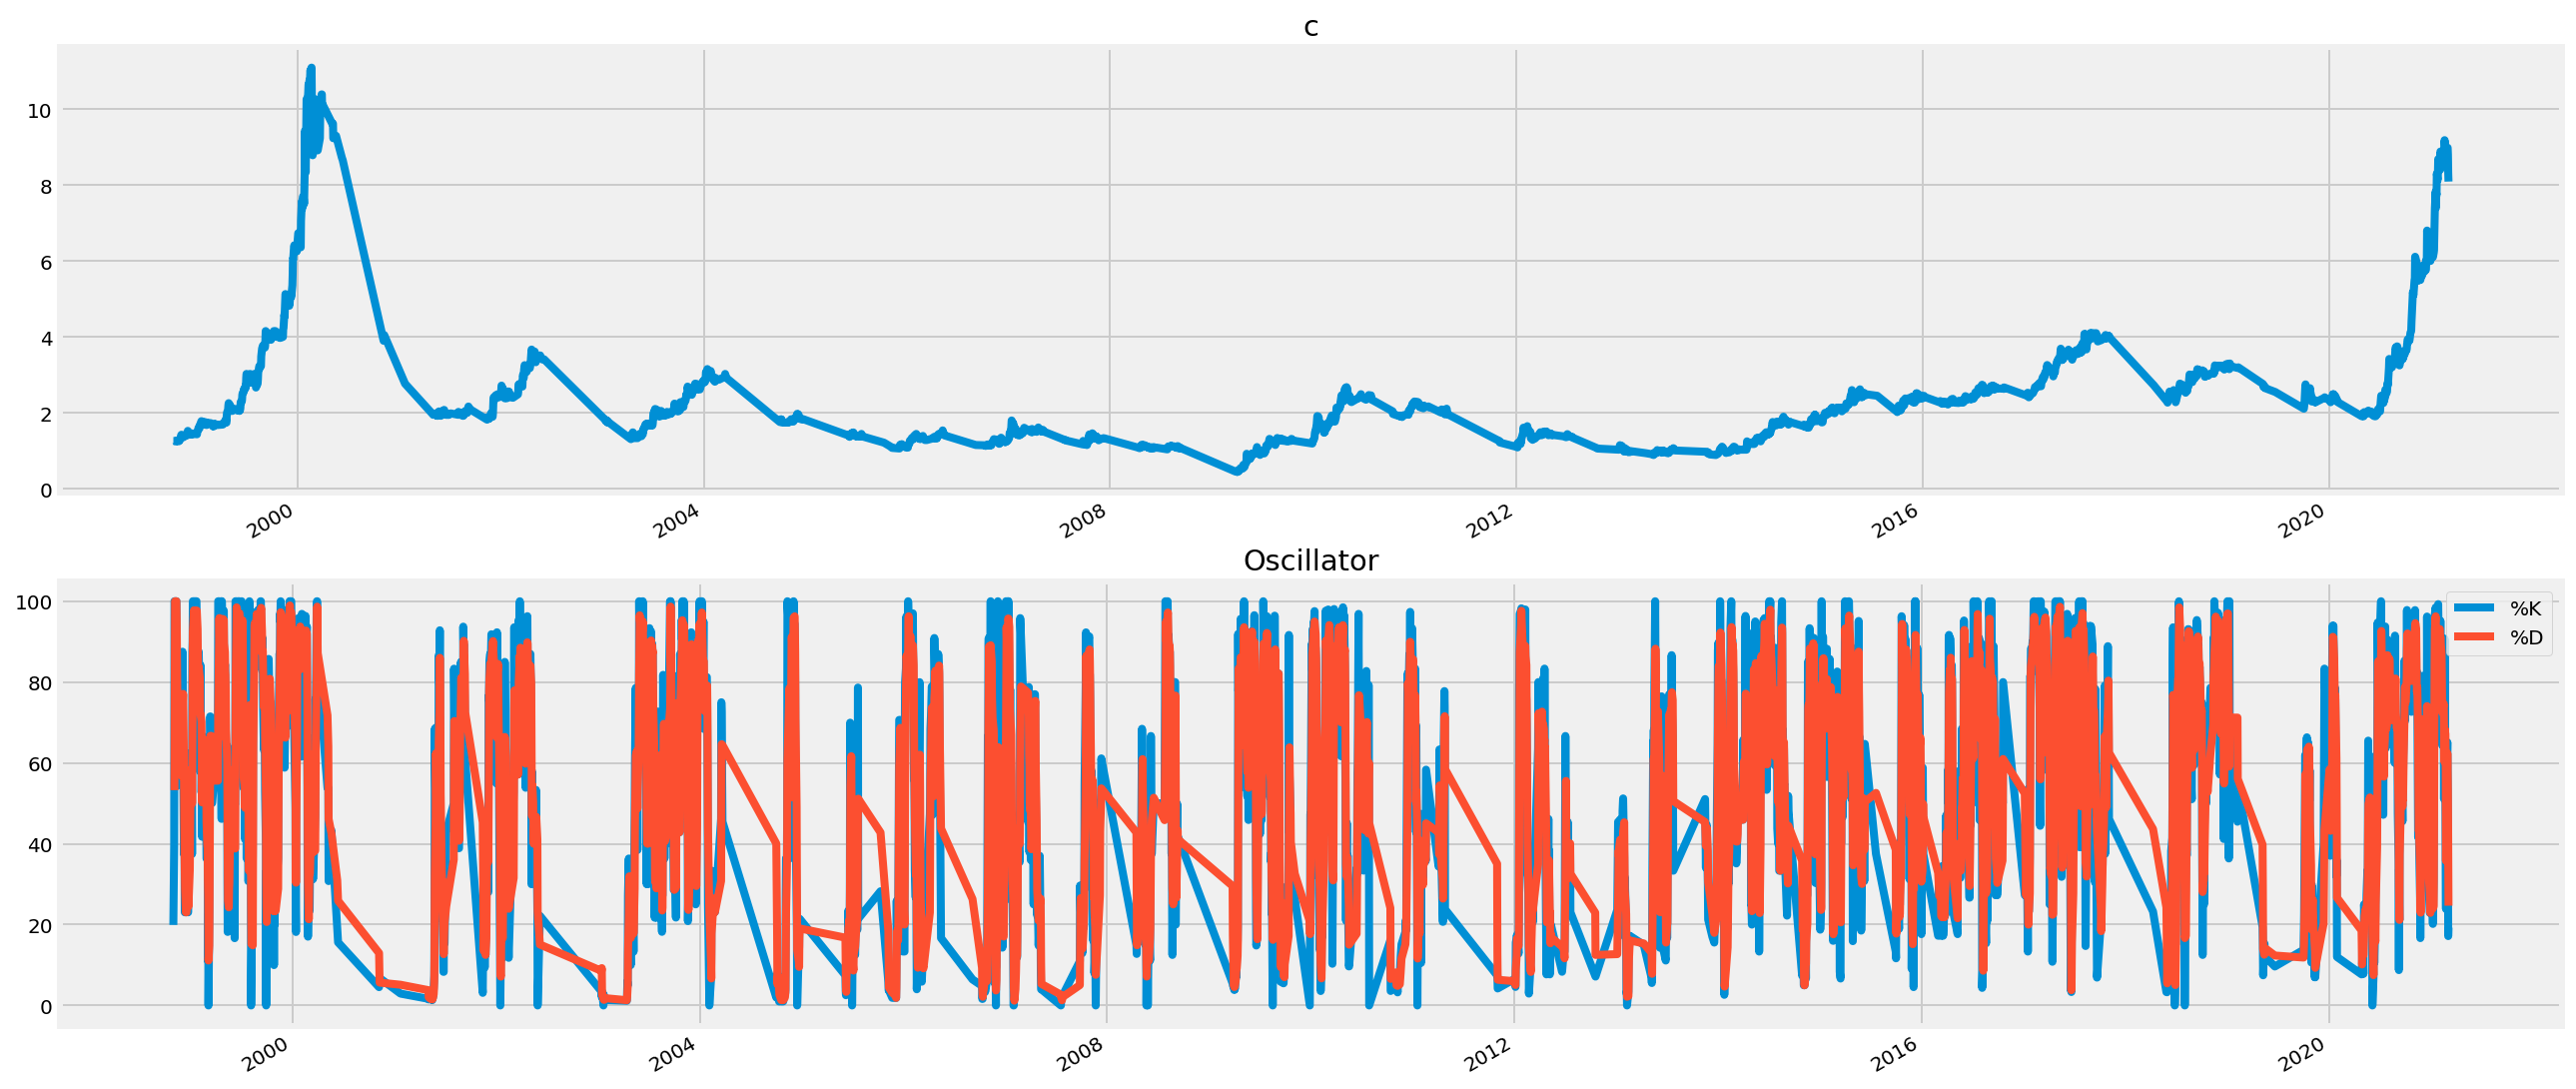

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
df['c'].plot(ax=axes[0]); axes[0].set_title('c')
df[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')

In [20]:
#Create a column in the DataFrame showing "TRUE" if sell entry signal is given and "FALSE" otherwise. 
#A sell is initiated when the %K line crosses down through the %D line and the value of the oscillator is above 80 
df['Sell OB'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > ob_cross) 

<ipython-input-20-c11fb49f7502>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell OB'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > ob_cross)


In [21]:
#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 
df['Buy OS'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < os_cross) 

<ipython-input-21-a3aa46205c2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy OS'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < os_cross)


In [22]:
#df['Strategy'] = np.nan  
#df.loc[df['Buy OS'],'Strategy'] = 1  
#df.loc[df['Sell OB'],'Strategy'] = 0 

In [23]:
df

,c,h,l,o,v,MA50,MAgap,L14,H14,%K,%D,Sell OB,Buy OS
1998-10-12,1.2564,1.2564,1.2564,1.2564,183300.0,1.1716,0.0848,NaN,NaN,NaN,NaN,False,False
1998-10-13,1.2564,1.2615,1.2564,1.2615,81900.0,1.1717,0.0847,NaN,NaN,NaN,NaN,False,False
1998-10-14,1.2564,1.2564,1.2564,1.2564,101400.0,1.1716,0.0848,NaN,NaN,NaN,NaN,False,False
1998-10-15,1.2564,1.2718,1.2564,1.2564,70200.0,1.1712,0.0852,NaN,NaN,NaN,NaN,False,False
1998-10-16,1.2564,1.2718,1.2564,1.2718,120900.0,1.1704,0.0860,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,8.9700,9.0300,8.6600,8.8100,1637600.0,7.5352,1.4348,8.41,9.27,65.116279,62.403101,False,False
2021-03-02,8.9800,9.4300,8.8600,9.0000,3023100.0,7.5946,1.3854,8.41,9.43,55.882353,59.325125,False,False
2021-03-03,8.8000,8.9600,8.7500,8.9100,1094000.0,7.6500,1.1500,8.42,9.43,37.623762,52.874131,False,False
2021-03-04,8.3200,8.7100,8.0900,8.6500,3021900.0,7.6964,0.6236,8.09,9.43,17.164179,36.890098,False,False


In [24]:
overbought =df['Sell OB']

In [25]:
oversold =df['Buy OS']

In [26]:
date_os=list(oversold[oversold == True].index)

In [27]:
date_ob=list(overbought[overbought == True].index)

In [28]:
# transaction recording
buy = []
sell = []
sdate = []
bdate = []
wr = []
pct = []


for n,i in enumerate(date_os):
    print(n,"Buy:", i, "Price:", df['c'].loc[i])
    buy.append(df['c'].loc[i])
    bdate.append(i)
    r=[]
    #print("before", len(r))
    for m,k in enumerate(date_ob):
        
        if k>i:
            r.append(m)
            #print('after',len(r))
            if len(r) ==1:
                print(m,"Sell :", k, "Price:",df['c'].loc[k])
                print("Percentage change:",(((df['c'].loc[k]/df['c'].loc[i])-1)*100) )
                sell.append(df['c'].loc[k])
                sdate.append(k)
                pct_change=((df['c'].loc[k]/df['c'].loc[i])-1)*100
                pct.append(((df['c'].loc[k]/df['c'].loc[i])-1)*100)
                wr =pct_change>0
                                
                if pct_change >0:
                    print("1")
                else:
                    print('0')
                    
            elif len(r)>1:
                pass
            
        
    print('........')
print('Number of trade:',len(date_os))

diff =len(buy)-len(sell)
#print('difference:',diff)

# Checking for final transaction, make sure it is sell, as we want to close the position
if len(buy) == len(sell):
    print("Yes \n", "Buy:", len(buy), "Sell:", len(sell))
    print("Position closed")
    #pass
elif len(buy) != len(sell):
    print("No, \n", "Buy:{}, Sell:{}, Closing the position".format(len(buy),len(sell)))
    
    del(buy[-diff:])
    del(bdate[-diff:])
    print("Position closed")
    
    

dct = {
    "Buy_Date": bdate,
    "Buy": buy,
    "Sell": sell,
    "Sell_Date": sdate,
    #"W_rate": wr,
    "Pct_change": pct
    
}

trans = pd.DataFrame(dct)
#print(len(wr[wr==True]))

0 Buy: 1999-03-08 00:00:00 Price: 1.6667
3 Sell : 1999-04-13 00:00:00 Price: 1.7308
Percentage change: 3.8459230815383494
1
........
1 Buy: 1999-08-11 00:00:00 Price: 2.7692
13 Sell : 1999-08-19 00:00:00 Price: 3.1795
Percentage change: 14.8165535172613
1
........
2 Buy: 2000-11-08 00:00:00 Price: 4.0513
27 Sell : 2001-09-06 00:00:00 Price: 2.1025
Percentage change: -48.103078024337876
0
........
3 Buy: 2001-05-10 00:00:00 Price: 1.9615
27 Sell : 2001-09-06 00:00:00 Price: 2.1025
Percentage change: 7.188376242671435
1
........
4 Buy: 2001-05-17 00:00:00 Price: 1.9744
27 Sell : 2001-09-06 00:00:00 Price: 2.1025
Percentage change: 6.488047001620756
1
........
5 Buy: 2001-06-27 00:00:00 Price: 1.9744
27 Sell : 2001-09-06 00:00:00 Price: 2.1025
Percentage change: 6.488047001620756
1
........
6 Buy: 2001-11-16 00:00:00 Price: 1.8846
28 Sell : 2001-12-21 00:00:00 Price: 2.4231
Percentage change: 28.573702642470543
1
........
7 Buy: 2001-11-21 00:00:00 Price: 1.8718
28 Sell : 2001-12-21 00:00

In [29]:
len(buy)-len(sell)

0

In [30]:
trans

,Buy_Date,Buy,Sell,Sell_Date,Pct_change
0,1999-03-08,1.6667,1.7308,1999-04-13,3.845923
1,1999-08-11,2.7692,3.1795,1999-08-19,14.816554
2,2000-11-08,4.0513,2.1025,2001-09-06,-48.103078
3,2001-05-10,1.9615,2.1025,2001-09-06,7.188376
4,2001-05-17,1.9744,2.1025,2001-09-06,6.488047
...,...,...,...,...,...
81,2019-11-12,2.3100,2.4600,2020-01-16,6.493506
82,2020-04-29,1.9300,2.0700,2020-06-26,7.253886
83,2020-05-05,1.9800,2.0700,2020-06-26,4.545455
84,2020-06-10,1.9800,2.0700,2020-06-26,4.545455


In [31]:
wr = []
for i in range(len(trans)):
    if trans["Pct_change"][i] > 0:
        wr.append(1)
    else:
        wr.append(0)
trans["wr"] = pd.Series(wr)

In [32]:
trans

,Buy_Date,Buy,Sell,Sell_Date,Pct_change,wr
0,1999-03-08,1.6667,1.7308,1999-04-13,3.845923,1
1,1999-08-11,2.7692,3.1795,1999-08-19,14.816554,1
2,2000-11-08,4.0513,2.1025,2001-09-06,-48.103078,0
3,2001-05-10,1.9615,2.1025,2001-09-06,7.188376,1
4,2001-05-17,1.9744,2.1025,2001-09-06,6.488047,1
...,...,...,...,...,...,...
81,2019-11-12,2.3100,2.4600,2020-01-16,6.493506,1
82,2020-04-29,1.9300,2.0700,2020-06-26,7.253886,1
83,2020-05-05,1.9800,2.0700,2020-06-26,4.545455,1
84,2020-06-10,1.9800,2.0700,2020-06-26,4.545455,1


In [33]:
net_pct=round(sum(trans['Pct_change']),4)
wrate = round(len(trans[trans["wr"]==1])/len(trans["wr"])*100, 4)
print('Stock :{}'.format(symbol))
print('when ob cross>{}.'.format(ob_cross))
print('when os cross<{}.'.format(os_cross))
print("Winning rate at {}% for {} trades and winning percentage {}%.".format(wrate, len(trans["wr"]),net_pct))
risk = round((100-wrate),2)
print("While, using this strategy, we are exposed to {}% of lossing risk for {} trades.".format(risk, len(trans["wr"])))

Stock :UNISEM
when ob cross>85.
when os cross<20.
Winning rate at 69.7674% for 86 trades and winning percentage 456.3246%.
While, using this strategy, we are exposed to 30.23% of lossing risk for 86 trades.


In [34]:
trans['wr'].value_counts()

1    60
0    26
Name: wr, dtype: int64